- EDA by Grevians Onula

In [265]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [266]:
df = pd.read_csv('Data/supermarket_sales.csv') #You can get this data from https://kaggle.com/datasets/supermarket-sales.csv

In [267]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [268]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

# Describing Data

In [269]:
df.shape

(1000, 17)

In [270]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
Invoice ID                 1000 non-null object
Branch                     1000 non-null object
City                       1000 non-null object
Customer type              1000 non-null object
Gender                     1000 non-null object
Product line               1000 non-null object
Unit price                 1000 non-null float64
Quantity                   1000 non-null int64
Tax 5%                     1000 non-null float64
Total                      1000 non-null float64
Date                       1000 non-null object
Time                       1000 non-null object
Payment                    1000 non-null object
cogs                       1000 non-null float64
gross margin percentage    1000 non-null float64
gross income               1000 non-null float64
Rating                     1000 non-null float64
dtypes: float64(7), int64(1), object(9)
memory usage: 132.9+ KB


In [272]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

# EDA

In [273]:
type(df['Date'])

pandas.core.series.Series

In [274]:
df['Date'] = pd.to_datetime(df['Date'])

In [275]:
df['weekday'] = df['Date'].dt.day_name()

In [276]:
df['weekday'].head()

0    Saturday
1      Friday
2      Sunday
3      Sunday
4      Friday
Name: weekday, dtype: object

In [277]:
df['weekday'].unique()

array(['Saturday', 'Friday', 'Sunday', 'Monday', 'Thursday', 'Wednesday',
       'Tuesday'], dtype=object)

In [278]:
df['month_name'] = df['Date'].dt.month_name()

In [279]:
df['month_name'].head()

0     January
1       March
2       March
3     January
4    February
Name: month_name, dtype: object

In [280]:
df['month_name'].unique()

array(['January', 'March', 'February'], dtype=object)

In [281]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,weekday,month_name
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday,March
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday,March
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,January
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday,February


>## Lets find some insights
- What is the average transaction for each month 
- What is the maximum and minimum transaction for each month

In [282]:
#Get the mean for the month: jan
jan_data = df[df['month_name'] == 'January']
jan_data.loc[:,'Total'].mean()

330.37462500000015

In [283]:
#Get the maximum transaction for the month: jan
jan_data.loc[:, 'Total'].max()

1034.46

In [284]:
#Get the minimun transaction for the month: jan
jan_data.loc[:, 'Total'].min()

12.6945

###You can do the same for the months March and February

# VISUALISAZATIONS

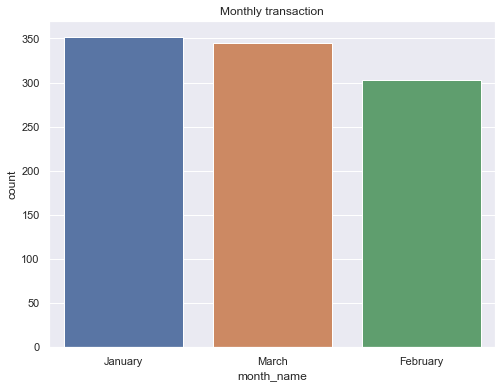

In [291]:
plt.figure(figsize=(8, 6))
plt.title('Monthly transaction')
sns.countplot(df['month_name'])

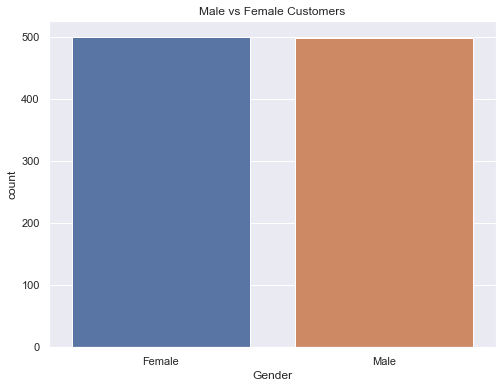

In [292]:
plt.figure(figsize=(8, 6))
plt.title('Male vs Female Customers')
sns.countplot(df['Gender'])

In [293]:
df['month_name'].value_counts()

January     352
March       345
February    303
Name: month_name, dtype: int64

In [294]:
df['weekday'].value_counts()

Saturday     164
Tuesday      158
Wednesday    143
Friday       139
Thursday     138
Sunday       133
Monday       125
Name: weekday, dtype: int64

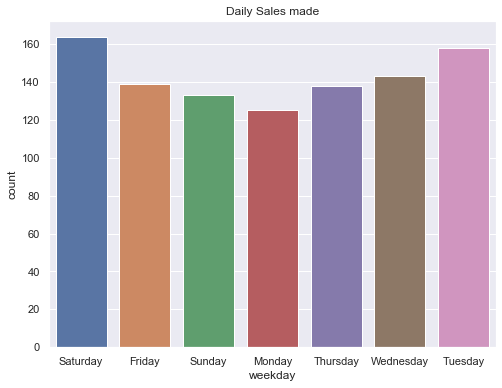

In [295]:
plt.figure(figsize=(8, 6))
plt.title('Daily Sales made')
sns.countplot(df['weekday'])

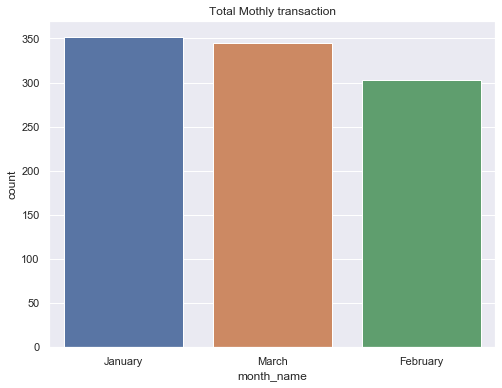

In [296]:
plt.figure(figsize=(8, 6))
plt.title('Total Mothly transaction')
sns.countplot(df['month_name'])

Text(0.5, 1.0, 'Transaction per month')

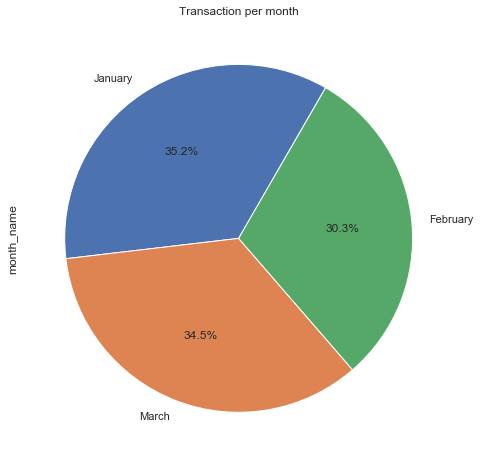

In [297]:
plt.figure(figsize=(8, 8))
explode=(0.1,0.05,0.05)
df['month_name'].value_counts().plot.pie(autopct='%1.1f%%', startangle=60)
plt.title('Transaction per month')

Text(0.5, 1.0, 'Transaction per month')

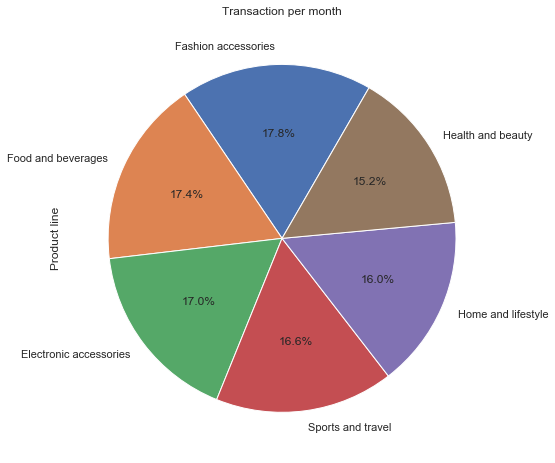

In [298]:
plt.figure(figsize=(8, 8))
explode=(0.1,0.05,0.05)
df['Product line'].value_counts().plot.pie(autopct='%1.1f%%', startangle=60)
plt.title('Transaction per month')

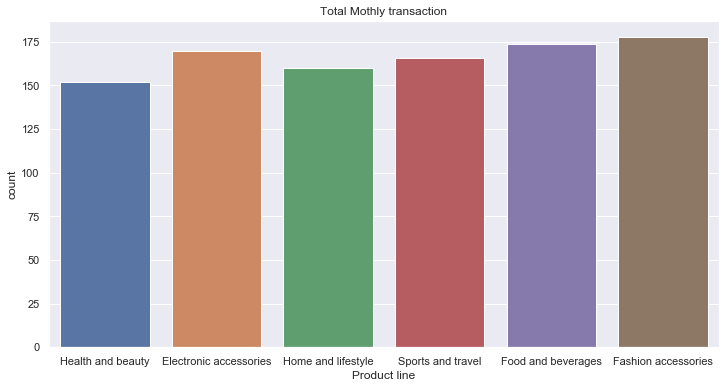

In [299]:
plt.figure(figsize=(12, 6))
plt.title('Total Mothly transaction')
sns.countplot(df['Product line'])

In [300]:
cat_feats = ['Gender']
dfs = pd.get_dummies(df, columns=cat_feats, drop_first=True)

In [301]:
dfs.head()

,Invoice ID,Branch,City,Customer type,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,weekday,month_name,Gender_Male
0,750-67-8428,A,Yangon,Member,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January,0
1,226-31-3081,C,Naypyitaw,Normal,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday,March,0
2,631-41-3108,A,Yangon,Normal,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday,March,1
3,123-19-1176,A,Yangon,Member,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,January,1
4,373-73-7910,A,Yangon,Normal,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday,February,1


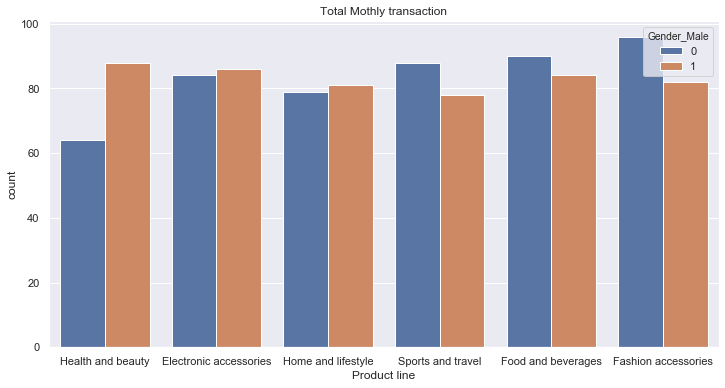

In [302]:
plt.figure(figsize=(12, 6))
plt.title('Total Mothly transaction')
sns.countplot(dfs['Product line'], hue = dfs.Gender_Male)

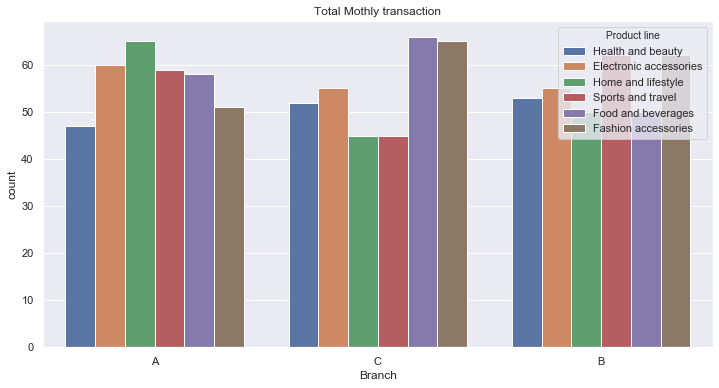

In [303]:
plt.figure(figsize=(12, 6))
plt.title('Total Mothly transaction')
sns.countplot(df['Branch'], hue = df['Product line'])

###### # !Tip
From the above visualisation, Most customers purchase Home and Lifestyle products from branch A than C, Fashion accessories has most customers in branches C and B than in A and finally Sports and travel has most customers in branch B than in the rest.  By this, as an analyst you can deduce that instead of commodities taking longer in the store they can be transfered to branches where their demand is high, e.g Part of Home and Lifestyle products can be taken to branch A  to C because there are approximately 5 customers in Branch A for every single customer in brach C for the same commodity.

In [304]:
topcustomer = df['Total'].value_counts(sort=True).head(10)

In [305]:
topcustomer

175.9170    2
829.0800    2
189.0945    2
470.9880    2
93.7440     2
216.8460    2
276.9480    2
87.2340     2
217.6335    2
263.9700    2
Name: Total, dtype: int64

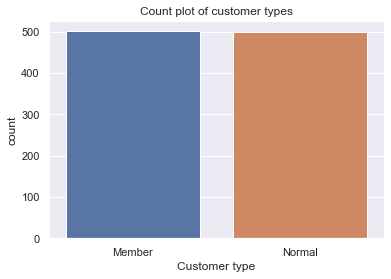

In [306]:
#plt.figure(figsize=(12, 6))
plt.title('Count plot of customer types')
sns.countplot(df['Customer type'])

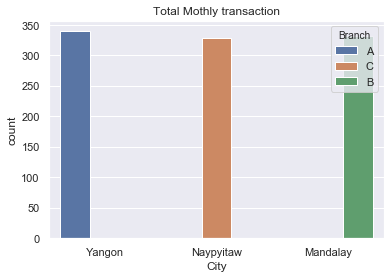

In [307]:
#plt.figure(figsize=(12, 6))
plt.title('Total Mothly transaction')
sns.countplot(df['City'], hue=df['Branch'])

- From the above we can conclude that Branches A, B and C are found in Yangon, Naypyitaw and Mandalay Cities respecively

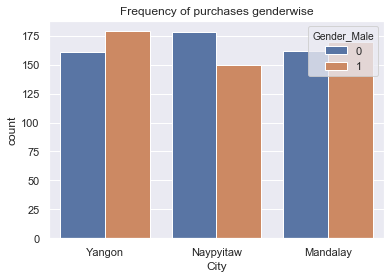

In [308]:
#plt.figure(figsize=(12, 6))
plt.title('Frequency of purchases genderwise')
sns.countplot(df['City'], hue=dfs['Gender_Male'])

- In Branch A(Yangon), the active purchase gender is Male and in B its Female

# Time Series Analysis

Text(0.5, 1.0, 'Frequency of Transaction made per day')

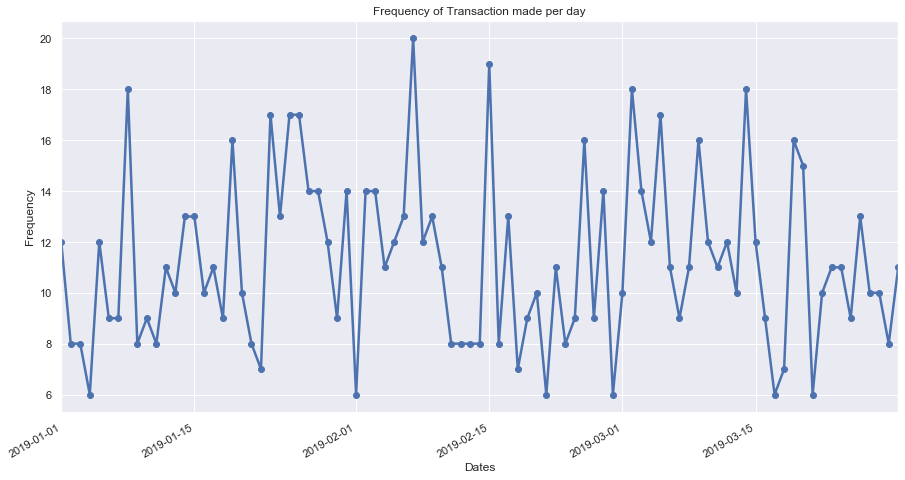

In [309]:
df['Date'].value_counts(sort=True).plot(kind='line', linewidth=2.5,linestyle='-', marker='o', figsize=(15, 8))
plt.xlabel('Dates')
plt.ylabel('Frequency')
plt.title('Frequency of Transaction made per day', )

# OUTLIER ANALYSIS
- An outlier is a data point that is far much from a real data point, take for instance a house dataset has a datapoint with say 100 bedrooms this would probably be an outlier for a normal context maybe a hotel, they are too extreme.

In [310]:
import numpy as np

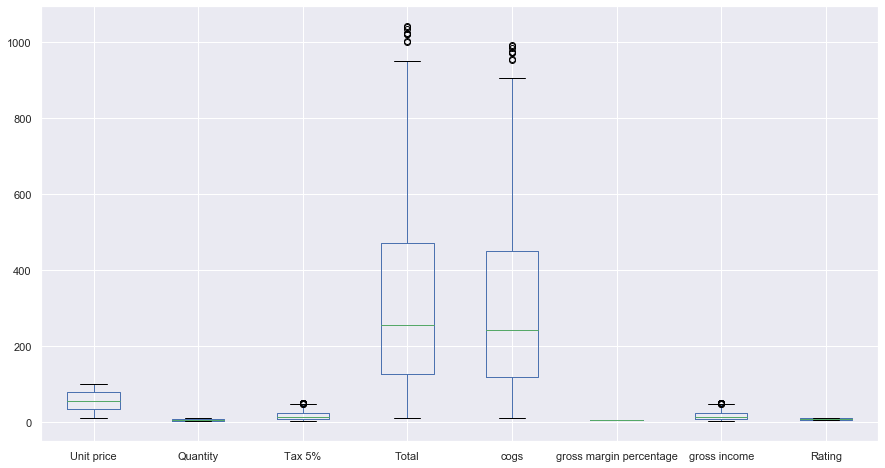

In [311]:
df.boxplot(figsize=(15, 8))

# !Tip
From the above boxplot we can see there are several outliers in columns Tax 5%, Total, cogs and gross income ofcourse 
we'll have to take care of them before we can develop a predictive model, while the rest of the columns have no outliers

In [312]:
def get_lower_upper_bound(my_data):
    #Get the third and first quartile
    q1 = np.percentile(my_data, 25)
    q3 = np.percentile(my_data, 75)
    
    #Calculate Interquartile Range (iqr)
    iqr = q3 - q1
    
    #Compute lower and upper boounds
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    return lower_bound, upper_bound

In [313]:
def get_outliers(my_data):
    lower_bound, upper_bound = get_lower_upper_bound(my_data)
    
    #Filter data less than lower bound and more than upper bouond
    return my_data[np.where((my_data > upper_bound)|
                           (my_data < lower_bound))]

Lets prove our hypothesy up there that we came up with from the boxplot

In [314]:
get_outliers(df['Total'].values)

array([1003.59 , 1039.29 , 1042.65 , 1002.12 , 1020.705, 1034.46 ,
       1023.75 , 1022.385, 1022.49 ])

In [315]:
get_outliers(df['cogs'].values)

array([955.8, 989.8, 993. , 954.4, 972.1, 985.2, 975. , 973.7, 973.8])

As you can see we have 9 outliers in the Total column and 6 in 
the cogs column, you can do the same for Tax 5% and gross income

In [316]:
get_outliers(df['Unit price'].values)

array([], dtype=float64)

In [317]:
get_outliers(df['Quantity'].values)

array([], dtype=int64)

- From the two above, Unit price and Quantity, we have no outliers the array is empty meaning all datapoints lie within the bounds, do the same for gross margin percentage and Rating

- You can also look at how to use zscore (scipy.stats.zscore) to detect outliers

#### REMOVING OUTLIERS

In [318]:
sp.head()

,Total,Unit price,Quantity,Tax 5%,cogs,gross margin percentage,gross income,Rating
0,548,74,7,26,522,4,26,9
1,80,15,5,3,76,4,3,9
2,340,46,7,16,324,4,16,7
3,489,58,8,23,465,4,23,8
4,634,86,7,30,604,4,30,5


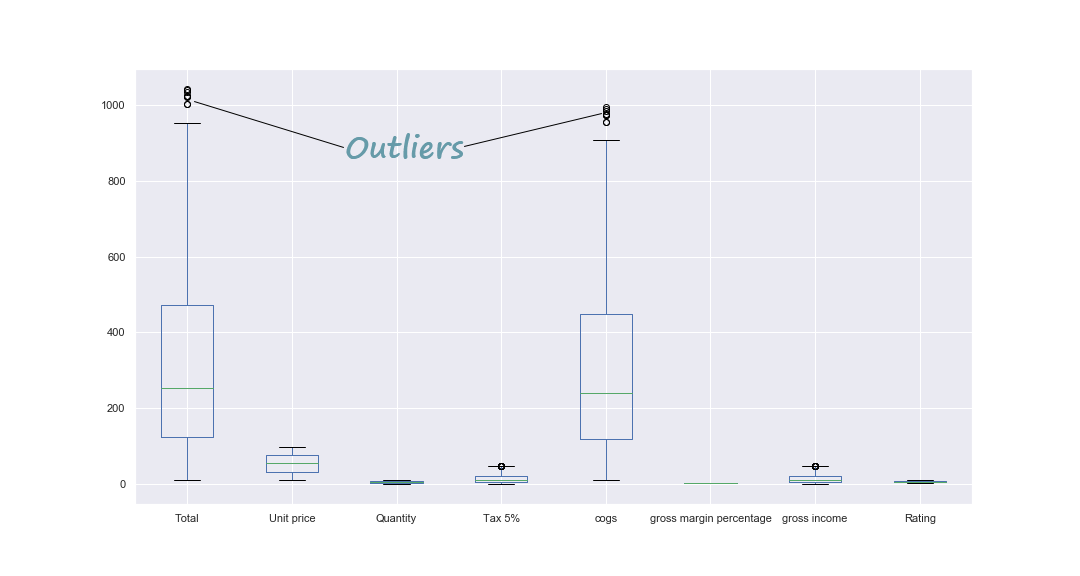

In [319]:
#sp.boxplot(figsize=(15, 8))
#plt.savefig('img.png')
from IPython.display import Image
Image(filename='img/img.png', width=900)

In [320]:
#Calculate the quartile and the interquartile ranges for the columns using dataframe object quantile
q1 = sp.quantile(0.25)
q3 = sp.quantile(0.75)
iqr = q3 - q1
print(iqr)

Total                      347.0
Unit price                  45.0
Quantity                     5.0
Tax 5%                      17.0
cogs                       330.0
gross margin percentage      0.0
gross income                17.0
Rating                       3.0
dtype: float64


In [321]:
sp1 = sp[~((sp < (q1 - 1.5 * iqr)) | (sp > (q3 + 1.5 * iqr))).any(axis=1)] #Removes outliers from the dataset

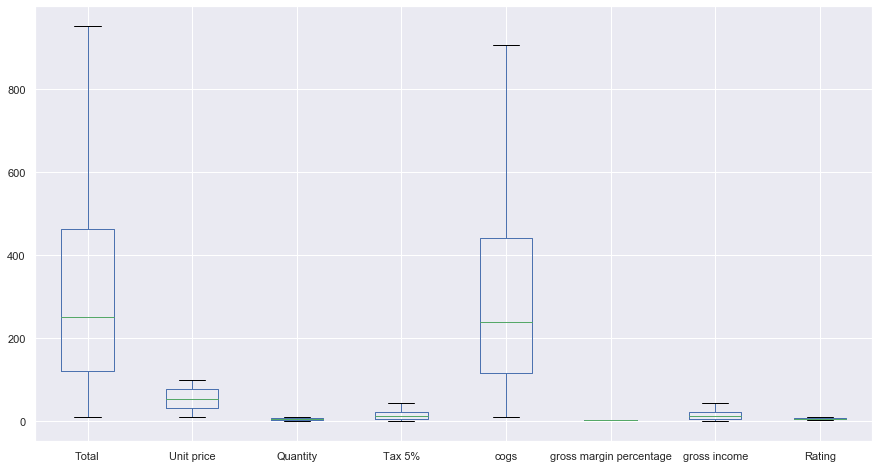

In [322]:
sp1.boxplot(figsize=(15, 8))

#And finally the outliers are gone!!

##### CONGRATULATIONS! I hope you've gained something from this notebook and can now develop your own visualisations for other datasets, try coming up with insights. GOOD LUCK!